<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=2.0">
</head>
<body>
    <h1>Récupération de données financières avec Yahoo Finance à l'aide de Python</h1>
    <p>Ce TD montre comment obtenir des données financières à partir de Yahoo Finance en utilisant Python. Nous pouvons récupérer des informations financières sur une entreprise (par exemple, des ratios financiers), ainsi que des données historiques du marché, en l'utilisant.</p>
</body>
</html>


### Installation du module Yahoo Finance en Python

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Charger la lib Yahoo Finance 

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Symbole Boursier ou Ticker</h1>
    <p>Un symbole boursier ou un ticker est une série unique de lettres attribuées à un titre financier à des fins de négociation sur les marchés financiers. Chaque entreprise cotée en bourse se voit attribuer un ticker, qui permet d'identifier son action de manière unique.</p>
    <p>Par exemple, le ticker de l'entreprise <strong>Apple Inc.</strong> est <strong>AAPL</strong> et celui de <strong>Microsoft</strong> est <strong>MSFT</strong>.</p>
</body>
</html>


### Étape 2: Créer une liste de tickers 

In [4]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'NFLX' , 'SPOT', 'ETH-USD']  # Exemple de tickers pour 
# Apple, Microsoft, et Google, Netflix, Spotify, Ethereum

#ATTENTION LES PRIX SONT EN $ Dollar Américain

### Étape 3: Télécharger les données financières: Utilisation de yfinance pour récupérer les données boursières

In [5]:
# Start = Date du début , end = Date de fin 
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")  

[*********************100%***********************]  6 of 6 completed


### Étape 4: Extraire les prix de clôture ajustés (Adj Close)

In [6]:
adj_close = data['Adj Close']

KeyError: 'Adj Close'

### Étape 5: Calculer les rendements (returns)

In [6]:
# Les rendements sont calculés en prenant la différence des prix de clôture ajustés
returns = adj_close.pct_change().dropna()  # pct_change() calcule les rendements


### Étape 6: Créer un DataFrame avec les rendements

In [7]:
returns= pd.DataFrame(returns)

### Étape 7: Afficher les 5 premières lignes du DataFrame de rendements

In [14]:
returns.head()

Ticker,AAPL,ETH-USD,GOOGL,MSFT,NFLX,SPOT
Date,,,,,,
2020-01-03,-0.009722,0.053069,-0.005231,-0.012452,-0.011855,0.005804
2020-01-04,0.000000,0.006690,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.000000,0.008939,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.007968,0.058905,0.026654,0.002585,0.030469,0.027672
2020-01-07,-0.004703,-0.005268,-0.001931,-0.009118,-0.015127,-0.004467


### Graphiques

<Figure size 1800x800 with 0 Axes>

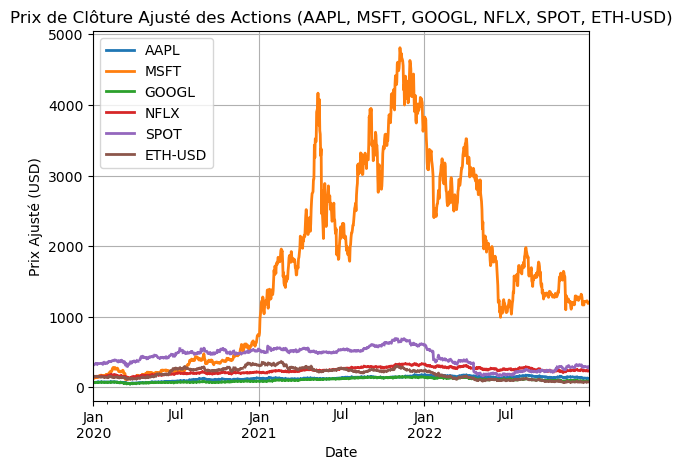

<Figure size 1800x800 with 0 Axes>

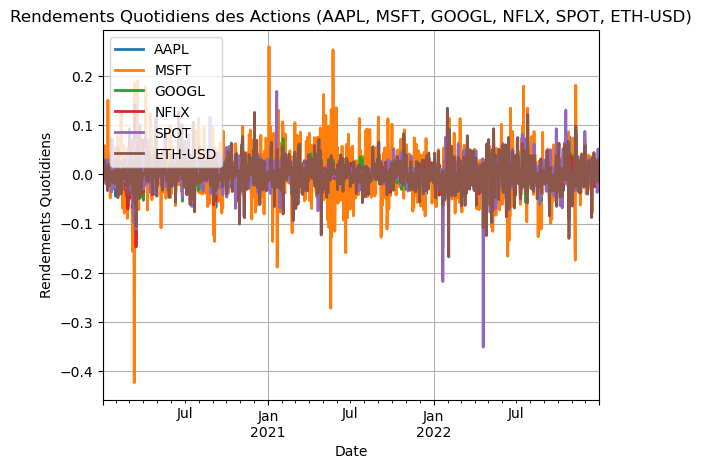

In [10]:
# Étape 7: Tracer les graphiques des prix ajustés
plt.figure(figsize=(18, 8))
adj_close.plot(title='Prix de Clôture Ajusté des Actions (AAPL, MSFT, GOOGL, NFLX, SPOT, ETH-USD)', lw=2)
plt.xlabel('Date')
plt.ylabel('Prix Ajusté (USD)')
plt.legend(tickers, loc='upper left')
plt.grid(True)
plt.show()

# Étape 8: Tracer les graphiques des rendements
plt.figure(figsize=(18, 8))
returns.plot(title='Rendements Quotidiens des Actions (AAPL, MSFT, GOOGL, NFLX, SPOT, ETH-USD)', lw=2)
plt.xlabel('Date')
plt.ylabel('Rendements Quotidiens')
plt.legend(tickers, loc='upper left')
plt.grid(True)
plt.show()

### Exemple de Régression 

<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Modélisation</h1>
    <p>L'idée ici est de modéliser les rendements quotidiens de l'Ethereum comme une fonction linéaire des prix des rendements actifs. Cette régression nous permet d'examiner dans quelle mesure les autres titres expliquent le comportement de l'ETH.</p>
</body>
</html>

                            OLS Regression Results                            
Dep. Variable:                ETH-USD   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     32.68
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.02e-31
Time:                        19:00:50   Log-Likelihood:                 1790.5
No. Observations:                1094   AIC:                            -3569.
Df Residuals:                    1088   BIC:                            -3539.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.001      2.011      0.0

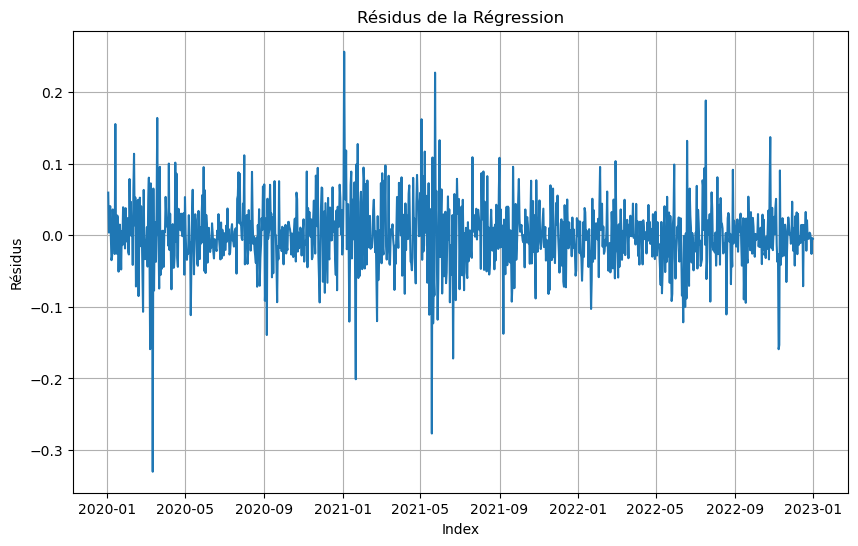

In [12]:
# Importer les bibliothèques nécessaires

import statsmodels.api as sm
# Séparer la variable dépendante (ETH-USD) et les variables indépendantes (autres tickers)
y = returns['ETH-USD']  # La variable cible (ETH-USD)
X = returns.drop(columns=['ETH-USD'])  # Les autres tickers

# Ajouter une constante pour l'interception dans le modèle
X = sm.add_constant(X)

#Estimer le modèle de régression linéaire
model = sm.OLS(y, X).fit()

#Afficher les résultats de la régression
print(model.summary())

# Étape 9: Tracer les résidus pour vérifier l'hypothèse des erreurs indépendantes et identiquement distribuées (i.i.d)
plt.figure(figsize=(10, 6))
plt.plot(model.resid)
plt.title('Résidus de la Régression')
plt.xlabel('Index')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()